C:\Users\nikhi\AppData\Local\Temp\ipykernel_17400\279167338.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Temp Max'] = pd.to_numeric(filtered_data['Temp Max'], errors='coerce')
c:\Users\nikhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1448.1562 - mae: 37.9645 - val_loss: nan - val_mae: nan
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1440.5493 - mae: 37.8739 - val_loss: nan - val_mae: nan
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1436.4733 - mae: 37.8175 - val_loss: nan - val_mae: nan
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1442.5851 - mae: 37.9020 - val_loss: nan - val_mae: nan
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1431.1428 - mae: 37.7443 - val_loss: nan - val_mae: nan
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1417.7433 - mae: 37.5676 - val_loss: nan - val_mae: nan
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1401.1055 - mae: 37.3424 - val_loss: nan - val_mae: nan
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1358.9073 - mae: 36.7735 - val_loss: nan - val_mae: nan
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1312.7554 - mae: 36.1285 - val

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17400\279167338.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.54 °C' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  results.loc[year, month] = f"{results.loc[year, month]:.2f} °C"
C:\Users\nikhi\AppData\Local\Temp\ipykernel_17400\279167338.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '41.74 °C (Heatwave Alert!)' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  results.loc[year, month] = f"{results.loc[year, month]:.2f} °C (Heatwave Alert!)"
C:\Users\nikhi\AppData\Local\Temp\ipykernel_17400\279167338.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.83 °C (Heatwave Alert!)' has dtype incompat

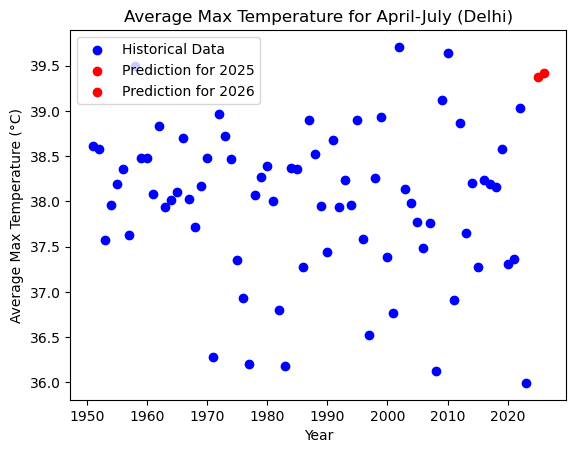

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('delhi-temp-rains.csv')

# Convert 'Date' to datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract year, month, and day from date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Filter the data for April, May, June, and July
filtered_data = data[data['Month'].isin([4, 5, 6, 7])]

# Convert 'Temp Max' to numeric, forcing errors to NaN and then dropping them
filtered_data['Temp Max'] = pd.to_numeric(filtered_data['Temp Max'], errors='coerce')

# Drop rows with NaN values in 'Temp Max'
filtered_data = filtered_data.dropna(subset=['Temp Max'])

# Group data by year and month and calculate the mean maximum temperature
temp_summary = filtered_data.groupby(['Year', 'Month'])['Temp Max'].mean().unstack()

# Prepare the dataset for modeling
X = temp_summary.index.values.reshape(-1, 1)  # Years as input feature
y = temp_summary.values  # Monthly average max temperatures as target

# Scale the data for neural network input
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build an Artificial Neural Network model
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='linear'))  # Output layer for 4 months

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Predict the average maximum temperatures for April-July 2025 and 2026
future_years = np.array([[2025], [2026]])
future_years_scaled = scaler.transform(future_years)
predictions = model.predict(future_years_scaled)

# Format and display the predictions in table format
months = ['April', 'May', 'June', 'July']
results = pd.DataFrame(predictions, columns=months, index=[2025, 2026])

# Highlight temperatures above 40°C in the output
for year in results.index:
    for month in results.columns:
        if results.loc[year, month] > 40:
            results.loc[year, month] = f"{results.loc[year, month]:.2f} °C (Heatwave Alert!)"
        else:
            results.loc[year, month] = f"{results.loc[year, month]:.2f} °C"

# Display the results
print("Predicted Average Maximum Temperatures for April-July (2025 & 2026):")
print(results)

# Optional: Plot the historical data and predictions
plt.scatter(X, y.mean(axis=1), color='blue', label='Historical Data')  # Mean of all months for visualization
for i, year in enumerate(future_years.flatten()):
    plt.scatter([year], predictions[i].mean(), color='red', label=f'Prediction for {year}')

plt.xlabel('Year')
plt.ylabel('Average Max Temperature (°C)')
plt.title('Average Max Temperature for April-July (Delhi)')
plt.legend()
plt.show()
